In [1]:
#https://www.kaggle.com/code/rizkyramadhana/tubes2

# Imports

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Data Loading

In [4]:
data = pd.read_csv('covid_19_indonesia_time_series_all.csv')
data

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,100.00%,1.00,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.00,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,...,0.511648,0.16,0.33,0.00,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,95.35%,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21754,12/2/2021,ID-SA,Sulawesi Utara,2,0,0,2,34715,1056,33566,...,1.259638,0.76,13140.24,0.00,399.71,39.97,3.04%,96.69%,NaN,1.0
21755,12/2/2021,ID-SB,Sumatera Barat,4,0,0,4,89849,2152,87605,...,-0.850253,0.72,16279.22,0.00,389.91,38.99,2.40%,97.50%,4.00,1.0
21756,12/2/2021,ID-SS,Sumatera Selatan,4,0,0,4,59937,3071,56830,...,-3.216212,0.49,7293.78,0.00,373.71,37.37,5.12%,94.82%,4.00,1.0
21757,12/2/2021,ID-SU,Sumatera Utara,4,0,1,3,106045,2889,103061,...,2.191894,0.27,7129.13,0.00,194.22,19.42,2.72%,97.19%,1.00,1.0


In [5]:
import datetime as dt
data['Date'] = data.apply(lambda x: pd.to_datetime(x['Date']), axis = 1)
data

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,2020-03-01,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,105.13%,NaN,NaN
1,2020-03-02,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,100.00%,1.00,1.0
2,2020-03-02,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.00,0.00,0.00,0.00%,0.00%,NaN,NaN
3,2020-03-02,ID-RI,Riau,1,0,0,1,2,0,3,...,0.511648,0.16,0.33,0.00,0.00,0.00,0.00%,150.00%,NaN,NaN
4,2020-03-03,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,95.35%,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21754,2021-12-02,ID-SA,Sulawesi Utara,2,0,0,2,34715,1056,33566,...,1.259638,0.76,13140.24,0.00,399.71,39.97,3.04%,96.69%,NaN,1.0
21755,2021-12-02,ID-SB,Sumatera Barat,4,0,0,4,89849,2152,87605,...,-0.850253,0.72,16279.22,0.00,389.91,38.99,2.40%,97.50%,4.00,1.0
21756,2021-12-02,ID-SS,Sumatera Selatan,4,0,0,4,59937,3071,56830,...,-3.216212,0.49,7293.78,0.00,373.71,37.37,5.12%,94.82%,4.00,1.0
21757,2021-12-02,ID-SU,Sumatera Utara,4,0,1,3,106045,2889,103061,...,2.191894,0.27,7129.13,0.00,194.22,19.42,2.72%,97.19%,1.00,1.0


In [6]:
data.columns

Index(['Date', 'Location ISO Code', 'Location', 'New Cases', 'New Deaths',
       'New Recovered', 'New Active Cases', 'Total Cases', 'Total Deaths',
       'Total Recovered', 'Total Active Cases', 'Location Level',
       'City or Regency', 'Province', 'Country', 'Continent', 'Island',
       'Time Zone', 'Special Status', 'Total Regencies', 'Total Cities',
       'Total Districts', 'Total Urban Villages', 'Total Rural Villages',
       'Area (km2)', 'Population', 'Population Density', 'Longitude',
       'Latitude', 'New Cases per Million', 'Total Cases per Million',
       'New Deaths per Million', 'Total Deaths per Million',
       'Total Deaths per 100rb', 'Case Fatality Rate', 'Case Recovered Rate',
       'Growth Factor of New Cases', 'Growth Factor of New Deaths'],
      dtype='object')

# Cleaning

In [7]:
data = data[['Date','Location','New Cases','New Deaths','New Recovered','New Active Cases','Total Cases','Total Deaths','Total Recovered','Total Active Cases', 'Population Density']]
data

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Population Density
0,2020-03-01,DKI Jakarta,2,0,0,2,39,20,41,-22,16334.31
1,2020-03-02,DKI Jakarta,2,0,0,2,41,20,41,-20,16334.31
2,2020-03-02,Indonesia,2,0,0,2,2,0,0,2,138.34
3,2020-03-02,Riau,1,0,0,1,2,0,3,-1,69.80
4,2020-03-03,DKI Jakarta,2,0,0,2,43,20,41,-18,16334.31
...,...,...,...,...,...,...,...,...,...,...,...
21754,2021-12-02,Sulawesi Utara,2,0,0,2,34715,1056,33566,93,190.17
21755,2021-12-02,Sumatera Barat,4,0,0,4,89849,2152,87605,92,131.37
21756,2021-12-02,Sumatera Selatan,4,0,0,4,59937,3071,56830,36,89.72
21757,2021-12-02,Sumatera Utara,4,0,1,3,106045,2889,103061,95,203.82


In [8]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21759 entries, 0 to 21758
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                21759 non-null  datetime64[ns]
 1   Location            21759 non-null  object        
 2   New Cases           21759 non-null  int64         
 3   New Deaths          21759 non-null  int64         
 4   New Recovered       21759 non-null  int64         
 5   New Active Cases    21759 non-null  int64         
 6   Total Cases         21759 non-null  int64         
 7   Total Deaths        21759 non-null  int64         
 8   Total Recovered     21759 non-null  int64         
 9   Total Active Cases  21759 non-null  int64         
 10  Population Density  21759 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(8), object(1)
memory usage: 1.8+ MB


In [9]:
data.head() #Menunjukkan sampel data

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Population Density
0,2020-03-01,DKI Jakarta,2,0,0,2,39,20,41,-22,16334.31
1,2020-03-02,DKI Jakarta,2,0,0,2,41,20,41,-20,16334.31
2,2020-03-02,Indonesia,2,0,0,2,2,0,0,2,138.34
3,2020-03-02,Riau,1,0,0,1,2,0,3,-1,69.80
4,2020-03-03,DKI Jakarta,2,0,0,2,43,20,41,-18,16334.31


In [10]:
for x in data.columns :
    bawah = data.sort_values(x).iloc[0][x]
    atas = data.sort_values(x).iloc[-1][x]
    print('Data {} berada pada rentang {} sampai {}'.format(x, bawah, atas))

Data Date berada pada rentang 2020-03-01 00:00:00 sampai 2021-12-03 00:00:00
Data Location berada pada rentang Aceh sampai Sumatera Utara
Data New Cases berada pada rentang 0 sampai 56757
Data New Deaths berada pada rentang 0 sampai 2069
Data New Recovered berada pada rentang 0 sampai 48832
Data New Active Cases berada pada rentang -25725 sampai 36726
Data Total Cases berada pada rentang 1 sampai 4257243
Data Total Deaths berada pada rentang 0 sampai 143858
Data Total Recovered berada pada rentang 0 sampai 4105680
Data Total Active Cases berada pada rentang -2306 sampai 574135
Data Population Density berada pada rentang 8.59 sampai 16334.31


In [11]:
data.describe(percentiles = [0.1,0.25,0.5,0.75,0.9])

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Population Density
count,21759.000000,21759.000000,21759.000000,21759.000000,2.175900e+04,21759.000000,2.175900e+04,21759.000000,21759.000000
mean,391.293580,13.220415,377.310998,0.762167,8.525997e+04,2648.289352,7.671260e+04,5899.079002,744.989784
std,2074.551043,76.482617,1999.062563,937.213509,3.685133e+05,11776.011067,3.403957e+05,27518.102431,2743.209719
min,0.000000,0.000000,0.000000,-25725.000000,1.000000e+00,0.000000,0.000000e+00,-2306.000000,8.590000
10%,0.000000,0.000000,0.000000,-100.000000,1.700000e+02,5.000000,7.800000e+01,36.000000,16.740000
25%,7.000000,0.000000,4.000000,-16.000000,1.822500e+03,50.000000,1.038500e+03,182.000000,47.790000
50%,41.000000,1.000000,31.000000,0.000000,1.078000e+04,283.000000,8.745000e+03,919.000000,103.840000
75%,151.000000,5.000000,143.000000,27.000000,3.646450e+04,1050.000000,3.293250e+04,2607.500000,262.700000
90%,569.000000,19.000000,532.200000,117.000000,1.266970e+05,3865.000000,1.095854e+05,8521.200000,1109.640000
max,56757.000000,2069.000000,48832.000000,36726.000000,4.257243e+06,143858.000000,4.105680e+06,574135.000000,16334.310000


C:\Users\Neil\AppData\Local\Temp/ipykernel_9848/762758284.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype = np.bool)


<AxesSubplot:>

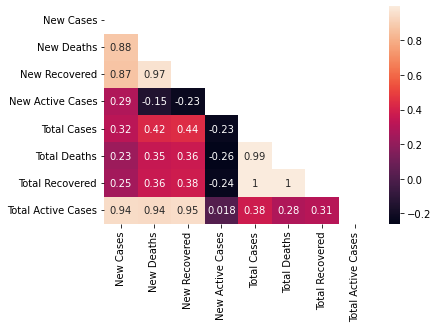

In [17]:
import seaborn as sns

corr_matrix = data[data['Location']=='Indonesia'].drop(['Location','Population Density'], axis=1).corr()
mask = np.zeros_like(corr_matrix, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, mask = mask, annot = True)

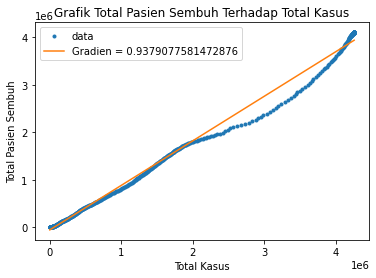

In [29]:
import matplotlib.pyplot as plt
#Dari heatmap di atas, terdapat kaitan sangat erat antara total kasus dengan total pasien yang sembuh. Coba kita visualisasikan
x = data[data['Location']=='Indonesia']['Total Cases']
y = data[data['Location']=='Indonesia']['Total Recovered']
koefisien =np.polyfit(x,y,1)
fungsi = np.poly1d(koefisien)
plt.plot(x,y,'.',label = 'data')
plt.plot(x,fungsi(x),'-',label = 'Gradien = {}'.format(koefisien[0]))
plt.legend(loc='upper left')
plt.xlabel('Total Kasus')
plt.ylabel('Total Pasien Sembuh')
plt.title('Grafik Total Pasien Sembuh Terhadap Total Kasus')
plt.show()

# So it can be concluded that the ratio of recovered patients to total cases is 84%